In [123]:
%run ego.py

In [2]:
from sklearn.preprocessing import StandardScaler

data = np.genfromtxt("dat_train.txt")

scaler = StandardScaler()
scaled = scaler.fit_transform(data)

X = scaled[:,1:]
y = scaled[:,0].reshape((-1,1))

IOError: dat_train.txt not found.

In [393]:
sig = np.ones(X.shape[1])

krig = Kriging(sig)
krig.fit(X, y)

In [394]:
np.sum((krig.yhat(X) - y)**2)

0.36149566701562236

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(krig.yhat(X), y)


NameError: name 'krig' is not defined

In [396]:
x_in = np.random.rand(9)
y_out = krig.yhat(x_in)
f_out = krig.f(x_in)
print f_out
print x_in.shape, y_out[0]
print scaler.inverse_transform(np.concatenate((y_out[0], x_in)))[0]

[[ 0.69299723]]
(9L,) [-0.0411379]
32770.821434


In [397]:
krig.yhat(np.random.rand(9))

array([[ 0.10374296]])

In [398]:
len(x_in)

9

(39L, 10L)


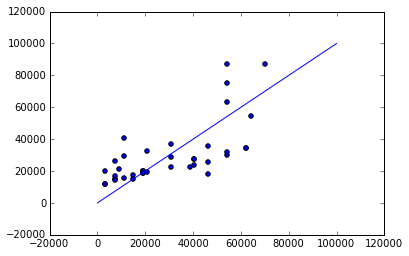

In [399]:
#import the test data
test = np.genfromtxt("dat_test.txt") 
print test.shape
test_scaled = scaler.transform(test)
Xt = test_scaled[:,1:]
#print test[:,1:].mean(axis=0)
yt_scale = test_scaled[:,0]
yt = test[:,0]

yt_out = scaler.inverse_transform(np.column_stack((Xt, krig.yhat(Xt))))[:,0]
plt.scatter(yt_out, yt)
plt.plot(np.linspace(0,100000), np.linspace(0,100000))

In [400]:
np.sqrt(np.sum((yt_out - yt)**2))

96993.812594581846

In [385]:
# sig = np.eye(X.shape[1])
# sig = np.diag(np.random.rand(X.shape[1]))
# krig2 = Kriging(sig)
# obj = 0.
# krig2.fit(X[:1],y[:1])

# for i,x in enumerate(X,2):
#     #print i
#     f_current = krig2.f(x)
#     krig2.fit(X[:i-1],y[:i-1])
#     #f_current = krig2.f(x)
#     #print f_current[0,0]
#     obj += np.nan_to_num(f_current[0,0])
# print obj
    

In [402]:
#krig.obj(np.ones(X.shape[1]))

krig.obj(np.random.rand(X.shape[1]))

194.2196137835094

In [389]:
np.diag(1/np.random.rand(X.shape[1]))

array([[ 3.49775567,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.93960088,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.08966216,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  9.0516656 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.55975495,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         6.9033417 ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.33312554,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

In [4]:
from sklearn.externals import joblib

In [5]:
%run preprocess.py

In [9]:
pre = Preprocess(pca_model='eco_full_pca.pkl')
pre.get_json("alluser_control.json")

In [60]:
#pre.train_pca()
X, y = pre.ready_player_one(2)

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)

In [61]:
X.shape

(33, 30)

In [124]:
rKrig = Kriging(np.ones(30))
rKrig.fit(X,y)


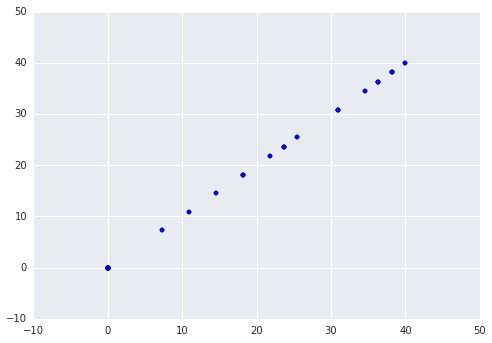

In [125]:
plt.scatter(rKrig.yhat(X), y)

In [117]:
err =np.abs(rKrig.yhat(X) - y)
np.sum(err>0.01)

0

In [118]:
np.argmax(err)

12

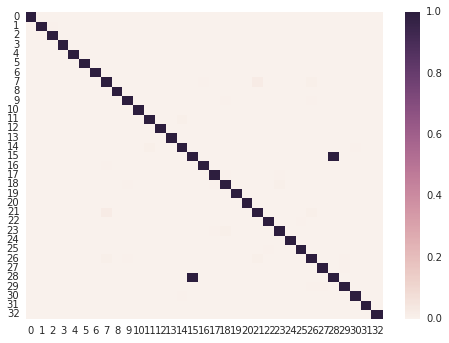

In [119]:
import seaborn as sns
sns.heatmap(rKrig.R)

In [120]:
scores = []
for i in np.logspace(-10, 55, num=100, base=2):
    scores += [rKrig.obj(np.ones(30)/i)]

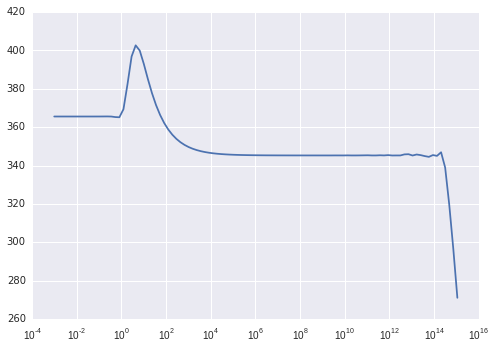

In [121]:
plt.semilogx(np.logspace(-10, 50, num=100, base=2), scores)

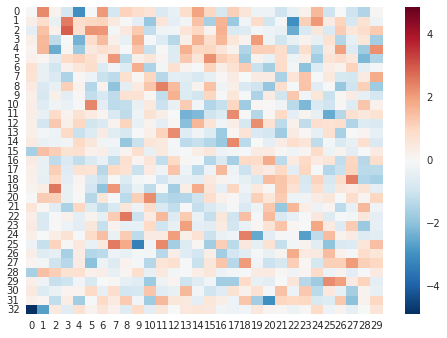

In [68]:
sns.heatmap(X)

In [46]:
pre.pca.inverse_transform(X[156])

array([[-0.01880987,  0.0049436 , -0.00129515, ..., -0.0251352 ,
        -0.0251352 , -0.02513379]])

In [49]:
(X[156]-X[157]), y[156],y[157]

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]), 0.0, 40.000000000000007)

In [54]:
pre.all_dat.shape

(2391, 18160)

In [58]:
top6 = [78, 122, 166, 70, 67, 69] #best players
m1, m2, m3, m4, m5, m6 = [pre.full_tab.userid.values==i for i in top6]
masks = [m1, m2, m3, m4, m5, m6]
p1=pre.all_dat[masks[0]]
p1_score=pre.full_tab["rem_nrg"].values[masks[0]]

##### 

In [59]:
np.sum(np.abs(p1[157] - p1[156]))

0.0

In [100]:
np.argmax(scores), np.power(np.logspace(-10, 50, num=100, base=2)[20],2)

(20, 18.927661099834339)

In [126]:
rKrig.obj(1/np.ones(30)/18.927661099834339)

395.33547949173112

In [129]:
np.diag(1/scale.std_)

array([[ 0.02812001,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.06379015,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.06939118,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0

In [131]:
pre.pca.components_.shape

(30, 18160)

In [134]:
import pickle
best_sig = pickle.load( open( "sigma.pickle" ) )

In [135]:
best_sig

array([  1.42579899e-01,   1.39946351e-02,   4.19394354e-04,
         2.04374717e-05,   4.04987056e-04,   7.53140016e-05,
         1.88012308e-04,   3.25416023e-04,   1.64089023e-04,
         5.53108401e-01,   7.96295008e-01,   3.80892424e-05,
         2.95508727e-02,   5.08154782e-04,   5.81564197e-02,
         2.87065203e-04,   2.03596672e-04,   4.43879878e-04,
         1.74961854e-04,   3.00879133e-03,   4.17652282e-05,
         2.16670130e+00,   9.45646611e-02,   2.10479311e-04,
         2.53384724e-01,   1.34137078e-04,   2.77470533e-04,
         3.34489234e-04,   1.91409018e-04,   3.12184401e-04])

ERROR! Session/line number was not unique in database. History logging moved to new session 64


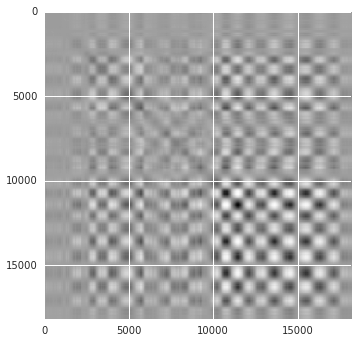

In [138]:
A = pre.pca.components_
Std_inv = np.diag(1/scale.std_)
vis = A.T.dot(Std_inv.dot(np.diag(best_sig).dot(Std_inv.dot(A))))
plt.imshow(vis)

#np.savetxt('visualize_this.txt', vis)

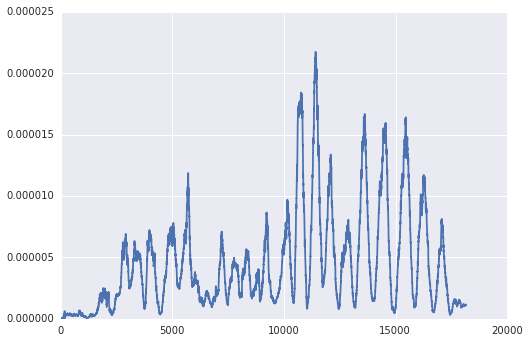

In [139]:
plt.plot(np.diag(vis))

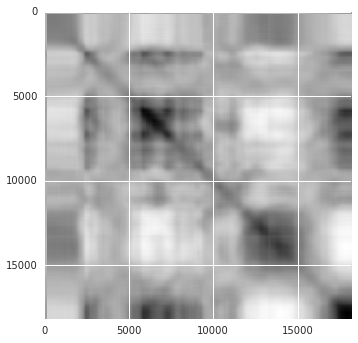

In [141]:
from scipy.linalg import pinv2, inv
visI = pinv2(vis)
plt.imshow(visI)

In [143]:
visI.shape

(18160, 18160)

In [154]:
A[:2].sum(axis=0)

array([ 115.32953991,   64.58347543])

In [160]:
import tables
h5file = tables.openFile('visI.h5', mode='w', title="P2 Solved Variance")
root = h5file.root
h5file.createArray(root, "visI", visI)
h5file.close()

/home/tbsexton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: openFile() is pending deprecation, use open_file() instead. You may use the pt2to3 tool to update your source code.
  from ipykernel import kernelapp as app
/home/tbsexton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: createArray() is pending deprecation, use create_array() instead. You may use the pt2to3 tool to update your source code.


In [ ]:
h5 = tb.open_file('visI.h5', 'r')
a = h5.root.data
row = a[0,:] #only one row gets loaded into memory
print row

In [161]:
data = [0,0,10,20,30,40,50,60,70,80,90,90,90,60,30,0,0,0,0,0,5,10,20,40,60,80,90,90,90,90,70,50,30,30,30,30,30,10,10,10,40,70,70,70,90,90,90,70,50,30,10,0,0,0,40,80,80,80,80,70,60,50,40,30,20,10,0,0,10,20,30,40,50,60,70,80,80,80,70,60,50,40,40,40,60,80,80,80,60,40,20,0,0,0,0,0]

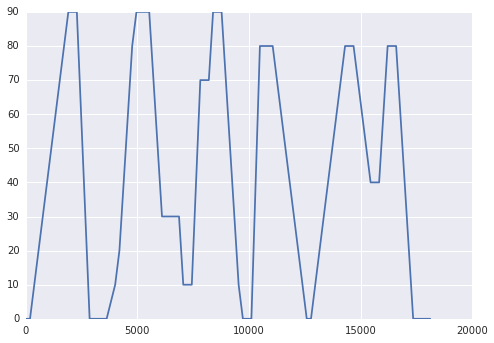

In [162]:
plt.plot(np.linspace(0,18120,num=96), data)

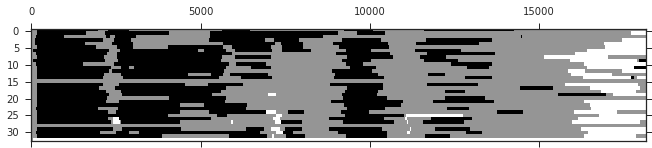

In [194]:
p2=pre.all_dat[masks[1]]
plt.figure(figsize=(15,5))
plt.matshow(p2, aspect=100)

<Container object of 33 artists>

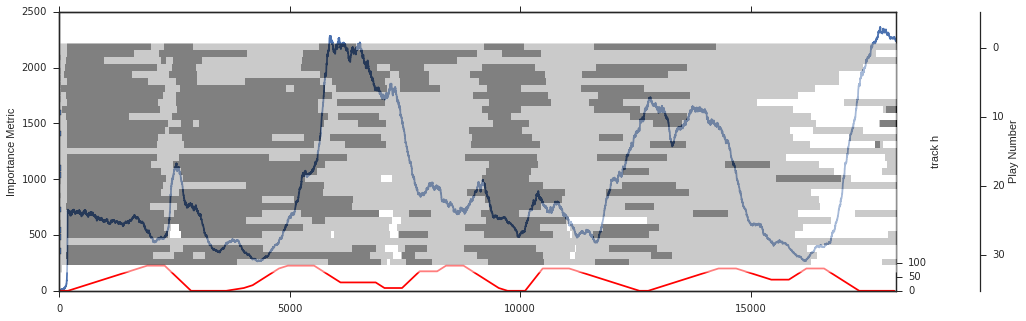

In [213]:
sns.set_style('ticks')
fig, host = plt.subplots(figsize=(15,5))

host.plot(np.diag(visI))

ax2 = host.twinx()
ax1 = host.twinx()
ax1.matshow(p2, aspect=150, alpha=.5)
ax2.plot(np.linspace(0,18120,num=96), data, color='r')
ax2.set_ylim(0,1000)
host.set_xlim(0,18160)
host.set_ylabel("Importance Metric")
ax1.spines["right"].set_position(("axes", 1.1))
ax1.set_ylabel("Play Number")
ax2.set_yticks([0., 50., 100.]);
ax2.set_ylabel("track h")
ax1.barh(range(33), y)

In [209]:
full_space = pre.pca.transform(pre.all_dat)
bounds = np.zeros((30,2))
for i,n in enumerate(full_space.T):
    bounds[i] = [np.min(n)-1, np.max(n)+1]
bounds
np.savetxt('ego_bounds.txt', bounds, delimiter=',', fmt='%.4e')

In [216]:
y.max(), y.argmax()

(40.000000000000007, 12)